In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18203376614873563850, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3695730044700619814
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4780950773680567045
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11276946637
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16015505822491095254
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
!ls
import os
!ls 'drive/My Drive/Data'

drive  Graph  sample_data
Cat  Dog  Testing  Untitled0.ipynb  Untitled1.ipynb


In [0]:
#!pwd
!ls '/content'
!rm /content/11702.jpg
!readlink -f 11702.jpg
#%rm /content/drive/My\Drive/Data/Cat/666.jpg
#%rm /home/nbuser/PetImages/Cat/666.jpg

drive  Graph  sample_data
rm: cannot remove '/content/11702.jpg': No such file or directory
/content/11702.jpg


In [0]:
!pwd
!ls '/content'
!readlink -f 11702.jpg
!readlink -f 666.jpg

/content
drive  Graph  sample_data
/content/11702.jpg
/content/666.jpg


In [0]:
##import os
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import scipy.misc
import cv2

In [0]:
DATADIR = 'drive/My Drive/Data'

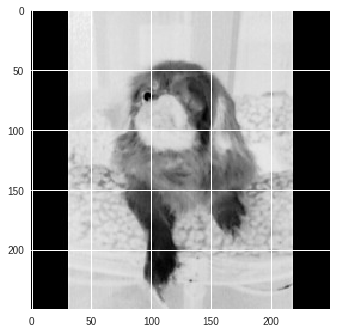

In [0]:
CATEGORIES = ['Dog','Cat']
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        break
    break

In [0]:
print(img_array.shape)

(250, 250)


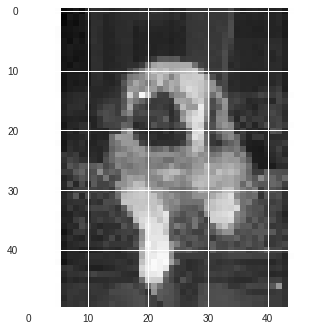

In [0]:
IMG_SIZE = 50
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator 
#import pickle
import time
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [0]:
data_gen = ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [0]:
training_batch = data_gen.flow_from_directory(DATADIR,batch_size=32,target_size=(100,100),classes=['Dog','Cat'],subset='training')
testing_batch = data_gen.flow_from_directory(DATADIR,batch_size=32,target_size=(100,100),classes=['Dog','Cat'],subset='validation')


Found 19946 images belonging to 2 classes.
Found 4985 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = (100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
__________

In [0]:
!pip install tensorboardcolab

In [0]:
from tensorboardcolab import TensorBoardColab,TensorBoardColabCallback
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://9d88fc54.ngrok.io


In [0]:
from keras.callbacks import ModelCheckpoint
modelcheckpoint = ModelCheckpoint('/logs',monitor='loss',mode='min',save_best_only=True)

In [0]:
#Total epocs = 4
model.fit_generator(training_batch,steps_per_epoch=int(24917/32),epochs=4,verbose=1,validation_data=testing_batch,validation_steps=int(4985/32),callbacks = [TensorBoardColabCallback(tbc),modelcheckpoint])

Epoch 1/4
778/778 [==============================] - 206s 265ms/step - loss: 0.6873 - acc: 0.5768 - val_loss: 0.6456 - val_acc: 0.6220
Epoch 2/4
778/778 [==============================] - 203s 261ms/step - loss: 0.5851 - acc: 0.6912 - val_loss: 0.5238 - val_acc: 0.7366
Epoch 3/4
778/778 [==============================] - 203s 261ms/step - loss: 0.4785 - acc: 0.7731 - val_loss: 0.4858 - val_acc: 0.7726
Epoch 4/4
778/778 [==============================] - 202s 260ms/step - loss: 0.4225 - acc: 0.8090 - val_loss: 0.4721 - val_acc: 0.7833


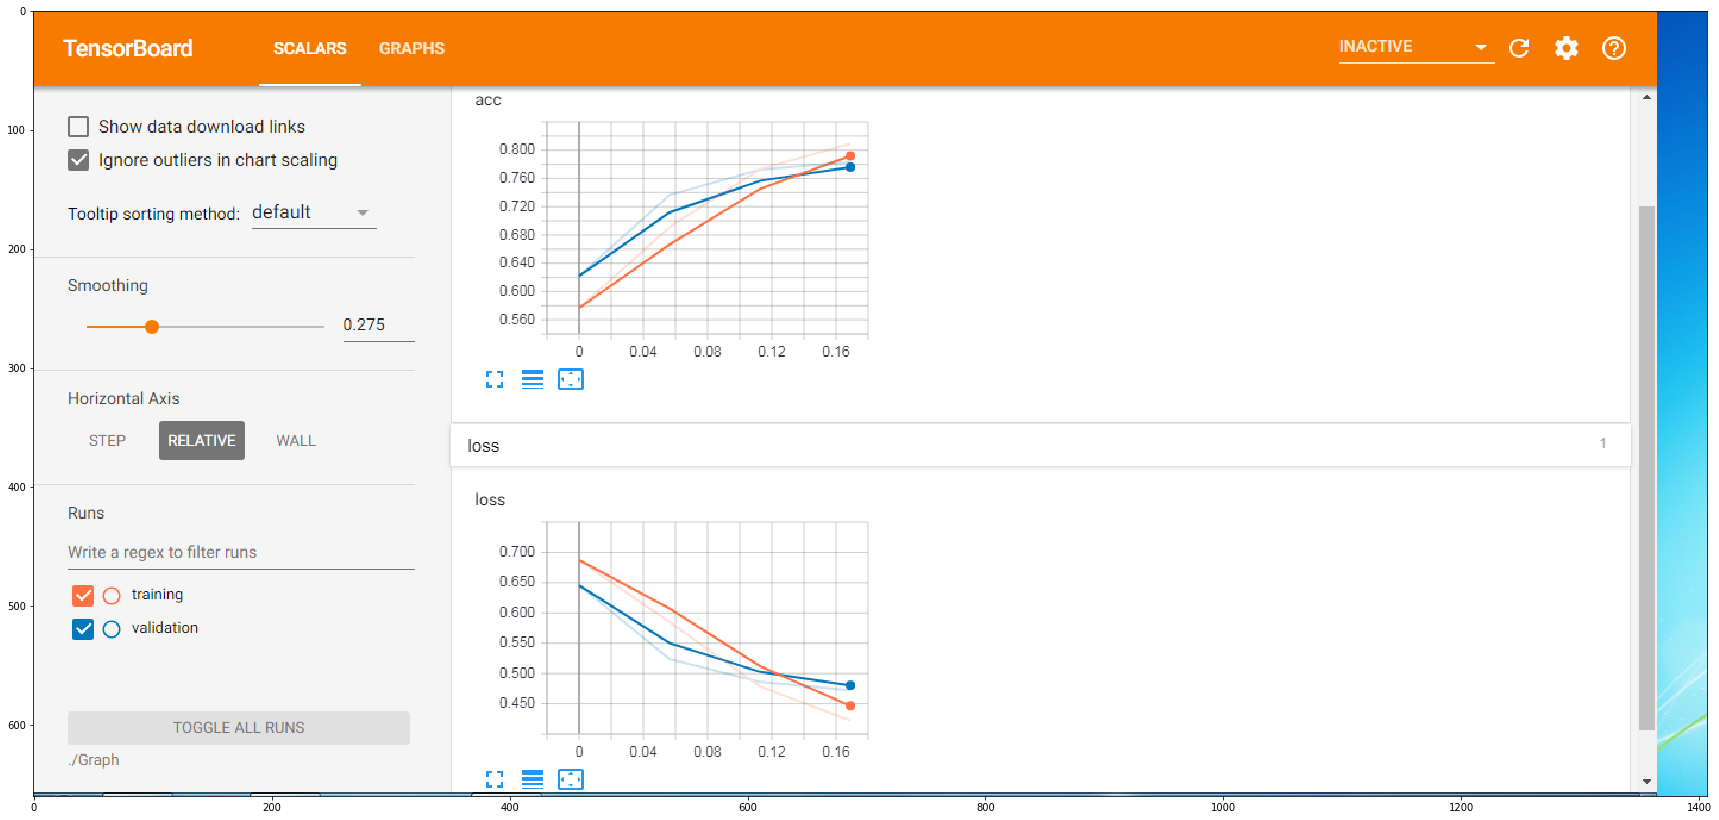

In [7]:
#Screenshot of Tensorboard
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
image = plt.imread('DogsvsCatClassifierTensorboard.png')
plt.imshow(image)